<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Unit 3 Project: Supervised Learning

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In this project, you will practice the core skill of this course: supervised learning with passively collected, tabular, cross-sectional data. We will start with a regression problem, and then address a classification problem.

### I have been trying to problem solve how to get the classification model to run, and I am sure Ic an

## Regression

In [4]:
# Load the dataset
noise = pd.read_csv(
    'data/airfoil_self_noise.dat',
    delimiter='\t',
    names=['frequency',
           'angle',
           'chord_length',
           'free_stream_velocity',
           'displacement_thickness',
           'self_noise',
          ]
)

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This is a tabular data set with 6 attributes and is multivariate. The variables appear to be all numerical. the use of the attributes is to calculate and or observe the sound pressure in decibles. This is numerous obervations of the same position of the airfoil and observer postion, which would make sense while all of the values look just about the same with small amounts of variation. I believe a model for this dataset would be useful to calculate the average and or predict the average scaled sound pressure that would come from this wind tunnel based on the position of the airfoil and observer position. 

#### Taking a look at the data 

In [5]:
noise.head()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


- Find out how many rows and columns are in `noise`.

In [6]:
noise.shape

(1503, 6)

There are 1503 rows and 6 columns in noise 

- Find out what data types are present.

In [7]:
noise.dtypes

frequency                   int64
angle                     float64
chord_length              float64
free_stream_velocity      float64
displacement_thickness    float64
self_noise                float64
dtype: object

Most of the variables are floats and the frequency is the only variable that is an integer 

- Find out how many null values there are in each columns.

In [8]:
noise.isnull().sum()

frequency                 0
angle                     0
chord_length              0
free_stream_velocity      0
displacement_thickness    0
self_noise                0
dtype: int64

The Data has zero null values 

- Check basic summary statistics for each column, including at least one measure of central tendency and one measure of dispersion.

In [9]:
noise.describe()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
count,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,2886.380572,6.782302,0.136548,50.860745,0.011140,124.835943
std,3152.573137,5.918128,0.093541,15.572784,0.013150,6.898657
min,200.000000,0.000000,0.025400,31.700000,0.000401,103.380000
25%,800.000000,2.000000,0.050800,39.600000,0.002535,120.191000
50%,1600.000000,5.400000,0.101600,39.600000,0.004957,125.721000
75%,4000.000000,9.900000,0.228600,71.300000,0.015576,129.995500
max,20000.000000,22.200000,0.304800,71.300000,0.058411,140.987000


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

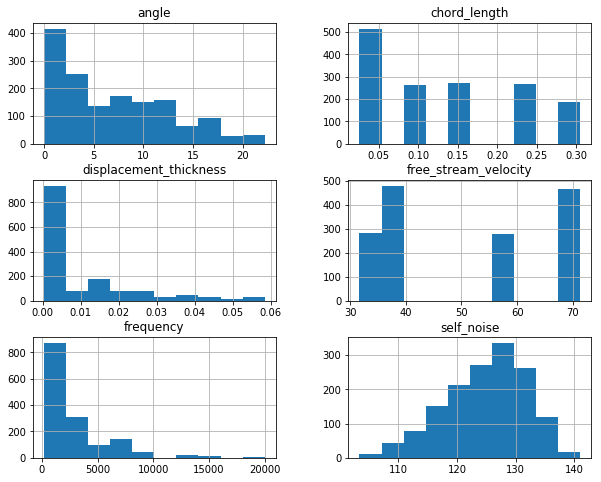

In [10]:
ax =noise.hist(figsize=(10,8))

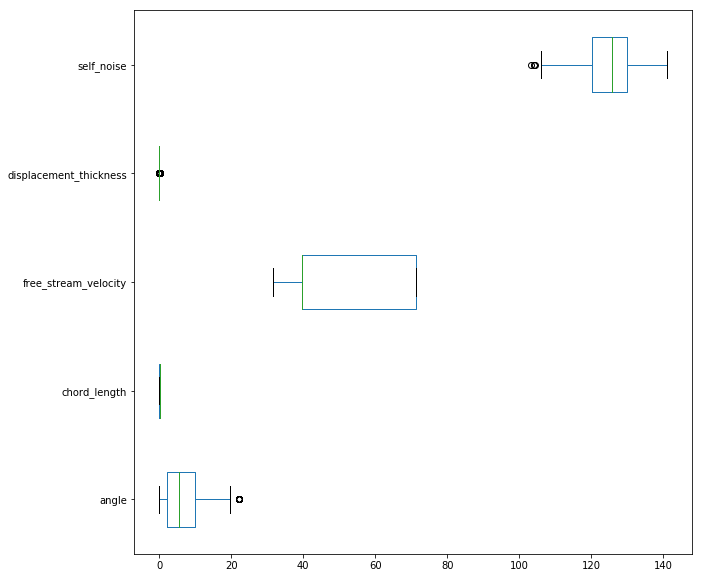

In [11]:
#I chose to look at this without frequnecy as freqency was too big
noise1 = noise.drop(columns = ['frequency'])
noise1.plot(kind = 'box', vert=False, figsize = (10,10))

- Which variables are approximately normally distributed?

The self-noise variable appears to be normally distributed, but seems like the only variable with a bell shaped curve (normal distribution)

- Which variables show strong skew?

The angle, discplacement thickness, and frequency are all right skewed and frequency being the strongest skew. in the Box plot above, I plotted without freqeuncy as the numbers through off the rest of the dispersion + central tendencies in the graph. 

- Make a scatterplot of each feature variable with the target variable "self_noise".

In [12]:
noise.head()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

target_col='self_noise'
y = noise.loc[:,target_col]

feature_cols = 'frequency', 'angle', 'free_stream_velocity', 'displacement_thickness'
X= noise.loc[:,feature_cols]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = False)
lr= LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.354607185139272

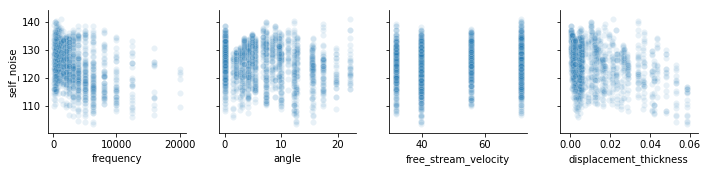

In [14]:
import seaborn as sns

g = sns.pairplot(noise,
                 x_vars=X.columns,
                 y_vars=target_col,
                 plot_kws={'alpha': .1}
                 )

- Make a heatmap of the correlation matrix for this dataset. Be sure to use an appropriate colormap!

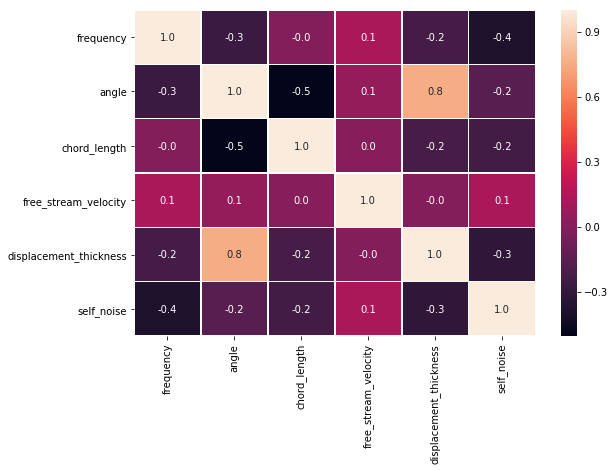

In [15]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(noise.corr(), annot=True, fmt=".1f", linewidths=.5, ax=ax);

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

In [16]:
noise.corr()

,frequency,angle,chord_length,free_stream_velocity,displacement_thickness,self_noise
frequency,1.000000,-0.272765,-0.003661,0.133664,-0.230107,-0.390711
angle,-0.272765,1.000000,-0.504868,0.058760,0.753394,-0.156108
chord_length,-0.003661,-0.504868,1.000000,0.003787,-0.220842,-0.236162
free_stream_velocity,0.133664,0.058760,0.003787,1.000000,-0.003974,0.125103
displacement_thickness,-0.230107,0.753394,-0.220842,-0.003974,1.000000,-0.312670
self_noise,-0.390711,-0.156108,-0.236162,0.125103,-0.312670,1.000000


The most positively correlarted variables are angle and displacement thickness, however, the majority of the variables are negatively correlated. The positive correlation is the strongest, however, since the majority is negative correlation I believe it would be best to take into account the negative correlation in how the data is modeled - this is important to note in the coeffcients of the model. 

- Develop a linear regression model to predict the target variable "self_noise". Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [17]:
#considering a train test spit usually spits on a 70/30 or 80/20 I am using the previous train test split I did above with the
#self noise as the target var

print('Test Data R-Squared:', lr.score(X_test, y_test))       # Comparing test data to null model/finding R-Squared 
print('Training Data R-Squared:', lr.score(X_train, y_train)) # Comparing test data to null model/finding R-Squared 



Test Data R-Squared: 0.32432712546993625
Training Data R-Squared: 0.354607185139272


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

the model performed slightly better on the training set than it did on the test set which means that it is overfitting (technically) however because the r squared value is so low, based on the R-squared scores I dont believe the model would be very effective at preciction. I beleive that this would be cause for more variance and less bias. 

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

the training set out performed the test set, which means that the model is overfitting to the training data and not generic enough to perform better on the test data. This would lead me to beleive that there might be too many variables in the training model, but also there is not a huge diference in the R Squared values

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

the model appears to have more of a variance problem bc it is overfitting 

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [18]:
#utilizing the train test split above

from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

0.9920778001227324
0.5182026104666113


- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

Overall, the model is now overfitting quite a lot more with random forest, but the model is capturing 99% of the variance in the training set which improved from the 35% it was capturing in the linear regression model. and there is quite a larger gap between the test and training set. 


- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [20]:
from sklearn.model_selection import KFold
kf = KFold(5, shuffle=True)
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=100),
                   param_grid={},
                   cv=kf,
                   return_train_score=True,
                  )
grid.fit(X, y)
results = grid.cv_results_
print(results['mean_train_score'])
print(results['mean_test_score'])


[0.98951348]
[0.92226003]


I decided to modify the random forest regressor model using grid search CV and a kfold method because generally kfold results in less bias I thought it would be a good approach. I also thought because our training data out performed out test data it could be good to split it up in different ways that would allow both the test + training to perform better. In the results of the mean test and train score, the train data set is still out performing the test set which means we are overfitting there is a decent gap in performance between the training set and the test set, but the model is still capturing 92% of the variation in the target variable.

- **BONUS:** Keep going! Find ways to make your model better.

In [21]:
from sklearn.model_selection import KFold
kf = KFold(6, shuffle=True)
grid = GridSearchCV(estimator=RandomForestRegressor(n_estimators=100),
                   param_grid={},
                   cv=kf,
                   return_train_score=True,
                  )
grid.fit(X, y)
results = grid.cv_results_
print(results['mean_train_score'])
print(results['mean_test_score'])

#I attempted to change the number of folds and went up to 8 and down to 4 but it did not change the gap between the data sets 

[0.98951791]
[0.93050253]


## Classification

- Read about this dataset [here](https://archive.ics.uci.edu/ml/datasets/Credit+Approval). Write a short paragraph describing this dataset in your own words. How could a model for this dataset be useful?

This is a tabular data set with 15 attributes and is multivariate. The attributes are categorical, integer, and real. the use of the attributes is to calculate credit approval. A model for this dataset could be useful for people who are looking to see if they would recieve credit approval or for companies to calculate credit approval based on modeling from the 15 attributes. 

In [211]:
# Load the dataset
credit = pd.read_csv(
    'data/crx.data',
    names=range(1, 17)
)

- Find out how many rows and columns are in `credit`.

In [212]:
credit.shape

(690, 16)

There are 690 rows and 16 columns in credit 

- Find out what data types are present.

In [213]:
credit.dtypes

1      object
2      object
3     float64
4      object
5      object
6      object
7      object
8     float64
9      object
10     object
11      int64
12     object
13     object
14     object
15      int64
16     object
dtype: object

- Columns 2 and 14 are "object" but are listed as "continuous" in the dataset description. Tranform these columns to have the appropriate data type. You will need to deal with the special character "?"

In [214]:
credit.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [215]:
credit = credit[credit.columns[1:]].replace('[?,+,-]', '', regex=True).astype(object)

In [216]:
credit.head()

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,30.83,0,u,g,w,v,1.25,t,t,1,f,g,00202,0,
1,58.67,4.46,u,g,q,h,3.04,t,t,6,f,g,00043,560,
2,24.50,0.5,u,g,q,h,1.5,t,f,0,f,g,00280,824,
3,27.83,1.54,u,g,w,v,3.75,t,t,5,t,g,00100,3,
4,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,


In [217]:
credit[14] = pd.to_numeric(credit[14])


In [218]:
credit[2] = pd.to_numeric(credit[2],errors='coerce')


In [219]:
#credit[15] = pd.to_numeric(credit[15])

In [220]:
#credit[3] = pd.to_numeric(credit[3])

In [221]:
#credit[8] = pd.to_numeric(credit[8])

In [237]:
credit[16] = pd.to_numeric(credit[16])

In [223]:
credit.dtypes

2     float64
3      object
4      object
5      object
6      object
7      object
8      object
9      object
10     object
11     object
12     object
13     object
14    float64
15     object
16     object
dtype: object

In [224]:
credit = credit[credit.columns[1:]].replace('g', '', regex=True).astype(object)

- Find out how many null values there are in each columns.

In [225]:
credit.isnull().sum()

3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14    13
15     0
16     0
dtype: int64

there are 12 null values in column 2 and 13 null values in column 14 - before changing the objects to floats it said there were no null values 

In [226]:
credit = credit.fillna(0)

- Check basic summary information for each column, including categorical columns.

In [227]:
credit.describe(include = 'all')

,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690.000000,690.000000,690
unique,NaN,4,2,15,10,NaN,2,2,NaN,2,3,NaN,NaN,1
top,NaN,u,,c,v,NaN,t,f,NaN,f,,NaN,NaN,
freq,NaN,519,527,137,399,NaN,361,395,NaN,374,625,NaN,NaN,690
mean,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,180.547826,1017.385507,NaN
std,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,173.970323,5210.102598,NaN
min,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,0.000000,0.000000,NaN
25%,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,60.000000,0.000000,NaN
50%,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,160.000000,5.000000,NaN
75%,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,272.000000,395.500000,NaN


- Plot of the distribution of each column, e.g. with some combination of histograms, bar plots, and box plots.

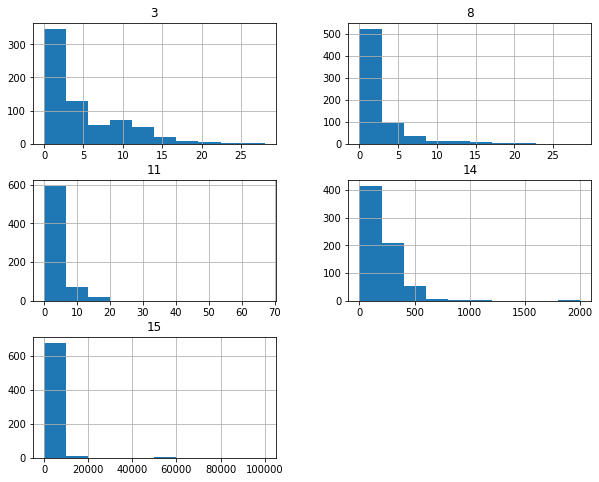

In [228]:
ax =credit.hist( figsize=(10,8))

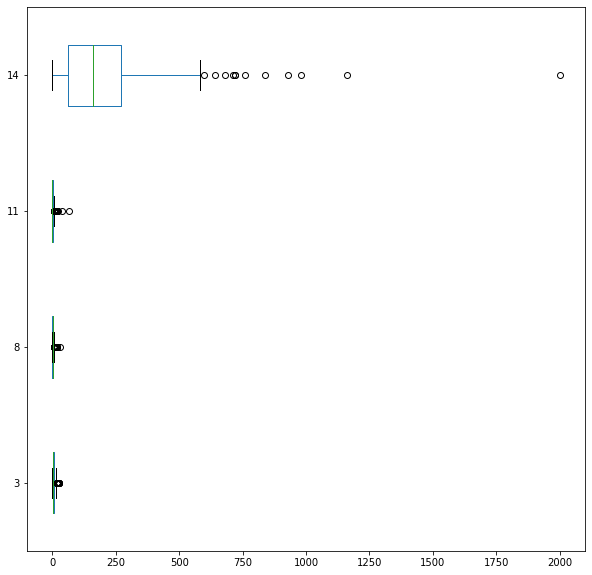

In [229]:

credit1 = credit.drop(columns = [15])
credit1.plot(kind = 'box', vert=False, figsize = (10,10))

- Which variables are approximately normally distributed?

I would say column 2 is the most 'normally' distributed variable for numerical values, however, it is still slightly right skewed. 

- Which variables show strong skew?

almost all of the numerical variables show a strong right skew, however, 15 is the strongest right skew with most of the values being closer to 0 to 1000. 

- Make a scatterplot of each feature variable with the target variable (`16`).

I changed 16 to numeric, but it does not seem to work with the rest of the numeric variables when plotting, and have tried running it multiple other ways but it will not run as an object to make a scatter

In [230]:
target_col = 16
X = credit.drop(target_col, axis='columns')
X = credit.drop(15, axis='columns')
y= credit.loc[:,target_col]

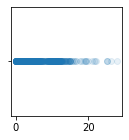

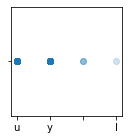

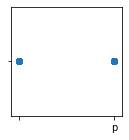

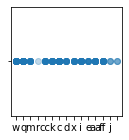

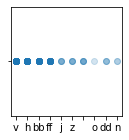

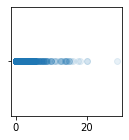

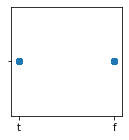

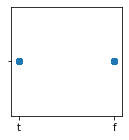

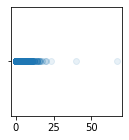

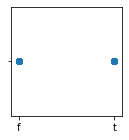

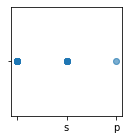

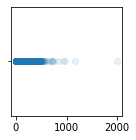

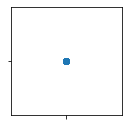

In [231]:
import seaborn as sns

for col in X.columns:
    fig, ax = plt.subplots(figsize=(2, 2))
    ax.scatter(X.loc[:, col], y, alpha=.1)
    plt.show()

- Make a heatmap of the correlation matrix for numeric variables in this dataset. Be sure to use an appropriate colormap!

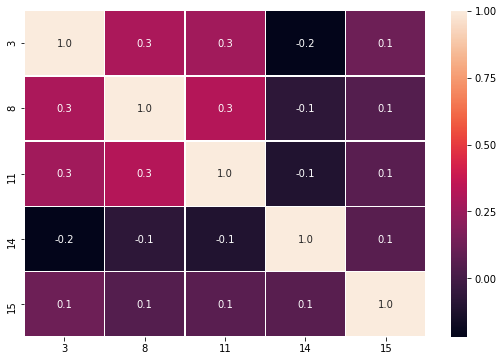

In [232]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(credit.corr(), annot=True, fmt=".1f", linewidths=.5, ax=ax);

- What do you notice about this dataset that will make a difference to how you model it? Feel free to do additional EDA at this point.

Also the value 16, even though I have converted to a numeric is not picking up the correlation with the rest of the variables. 

I notice that the 14 category interacts negatively with the rest of the variables consistently more so together than the rest of the variables. 

- What is the accuracy of a null model that just predicts the most common outcome each time on this dataset?

- Develop a logistic regression model to predict the target variable `16`. Train it on 70% of the data. Gets its accuracy score on both that 70% and the other 30%. Use dummy-coding on categorical columns. Otherwise, at this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [185]:
credit.head()

,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000,u,,w,v,1.25,t,t,1,f,,202.0,0,0.0
1,4.460,u,,q,h,3.04,t,t,6,f,,43.0,560,0.0
2,0.500,u,,q,h,1.50,t,f,0,f,,280.0,824,0.0
3,1.540,u,,w,v,3.75,t,t,5,t,,100.0,3,0.0
4,5.625,u,,w,v,1.71,t,f,0,f,s,120.0,0,0.0


In [ ]:
#I had to make the column 16 numeric in order to get the values below to run, however, it does not run accurately as it says that
#my test set would not have any content. I have tried running it different ways to allow 16 to be the target variables
#however it still does not work

In [238]:
credit_dummies = pd.get_dummies(credit, drop_first=True)
credit_dummies = credit_dummies.dropna()

In [239]:
credit_dummies.loc[:, 'received_credit'] = 1 - credit_dummies.loc[:, 16]
credit_dummies = credit_dummies.drop(16, axis='columns')

In [240]:
target_col = 'received_credit'
X = credit_dummies.drop(target_col, axis='columns')
y = 1 - credit_dummies.loc[:, target_col]

In [241]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split



In [242]:
lenreg = LogisticRegression()

print (y_train[0:10])
y_train.to_csv(path='ytard.csv')

if len(np.sum(y_train)) in [len(y_train),0]:
    print ("all one class")
    #do something else
else:
    #OK to proceed
    lenreg.fit(X_train, y_train)
    y_pred = lenreg.predict(X_test)
    print (metics.accuracy_score(y_test, y_pred))


171    0.0
233    0.0
49     0.0
621    0.0
376    0.0
246    0.0
631    0.0
381    0.0
676    0.0
96     0.0
Name: received_credit, dtype: float64


/Users/nataliekampf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'path' will be renamed to 'path_or_buf'.
  after removing the cwd from sys.path.
/Users/nataliekampf/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.


TypeError: object of type 'numpy.float64' has no len()

In [243]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size=.3, shuffle=True)
)
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

- Develop a random forest model with 100 or more trees to predict the target variable. Train it on 70% of the data. Gets its R^2 score on both that 70% and the other 30%. At this point just do the bare minimum to get the model to run, without worrying about feature engineering or other practices you might use to improve the model.

In [244]:

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, oob_score=True)
rfc.fit(X_train, y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
1.0


In [245]:
y.value_counts(normalize=True)

Series([], Name: received_credit, dtype: float64)

- Compare the bias, variance, and overall predictive performance of your random forest model to that of your linear regression model.

Due to the fact that my model is not working because the value 16 is not functioning in the test set, I don't believe that I am able toc compare overall predictive performance. From the above in the random forest classifier it is stating that the scores of both the train + test set are 100% accurate. 

- Find a way to get a better score from either linear regression or a random forest. Make notes about what you are trying and why.

In [246]:
#I would try to get a better score through a random forest classifier so it could look at the predictions from
# a random standpoint rather than logistic regressions 
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
kf = KFold(5, shuffle=True)

grid_1 = GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
                   param_grid={},
                   cv=kf,
                   return_train_score=True,
                  )
grid_1.fit(X, y)
results = grid_1.cv_results_
print(results['mean_train_score'])
print(results['mean_test_score'])


ValueError: Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=0.

- **BONUS:** Keep going! Find ways to make your model better.